<a href="https://colab.research.google.com/github/Masoud-Ghasemian/PyTorch_Basics/blob/master/Build_your_first_Neural_Network_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from torch import nn, optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [4]:
!gdown --id 1Q1wUptbNDYdfizk5abhmoFxIQiX19Tn7

Downloading...
From: https://drive.google.com/uc?id=1Q1wUptbNDYdfizk5abhmoFxIQiX19Tn7
To: /content/weatherAUS.csv
14.2MB [00:00, 53.7MB/s]


In [5]:
df = pd.read_csv('weatherAUS.csv')

In [6]:
df.shape

(142193, 24)

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [8]:
cols = ['Rainfall', 'Humidity9am', 'Pressure9am', 'RainToday', 'RainTomorrow']
df = df[cols]

In [9]:
df.shape

(142193, 5)

In [10]:
df.head()

,Rainfall,Humidity9am,Pressure9am,RainToday,RainTomorrow
0,0.6,71.0,1007.7,No,No
1,0.0,44.0,1010.6,No,No
2,0.0,38.0,1007.6,No,No
3,0.0,45.0,1017.6,No,No
4,1.0,82.0,1010.8,No,No


In [15]:
df['RainToday'].replace({'No':0, 'Yes':1}, inplace = True)
df['RainTomorrow'].replace({'No':0, 'Yes':1}, inplace = True)

In [18]:
df =df.dropna(how='any')

In [19]:
df.shape

(126111, 5)

Text(0, 0.5, 'Number of days')

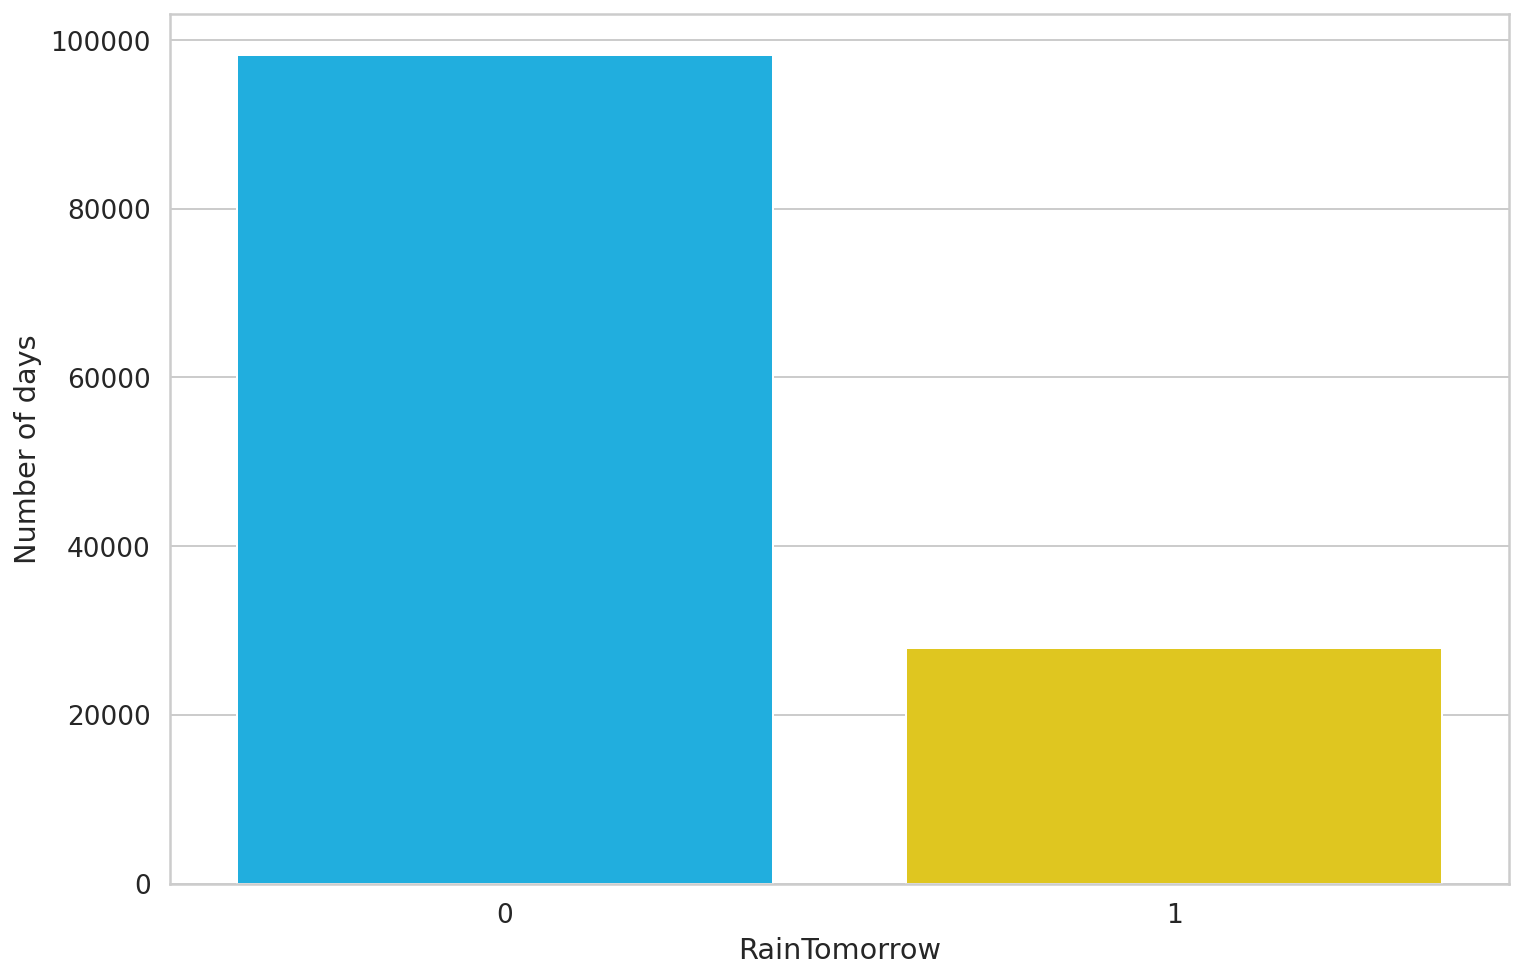

In [21]:
sns.countplot(df.RainTomorrow)
plt.ylabel('Number of days')

In [24]:
df.RainTomorrow.value_counts()/df.shape[0]

0    0.77856
1    0.22144
Name: RainTomorrow, dtype: float64

In [25]:
cols

['Rainfall', 'Humidity9am', 'Pressure9am', 'RainToday', 'RainTomorrow']

In [26]:
x = df[['Rainfall', 'Humidity9am', 'Pressure9am', 'RainToday']]
y = df[['RainTomorrow']]

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = RANDOM_SEED)

In [62]:
x_train = torch.from_numpy(x_train.values).float()
x_test = torch.from_numpy(x_test.values).float()
y_train = torch.from_numpy(y_train.values).flatten().float()
y_test = torch.from_numpy(y_test.values).flatten().float()

In [63]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([100888, 4]) torch.Size([100888])
torch.Size([25223, 4]) torch.Size([25223])


In [64]:
class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3, 1)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return F.sigmoid(self.fc3(x))

In [65]:
model = Net(x_train.shape[1])

In [66]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [67]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0895,  0.2539, -0.3048, -0.4950],
         [-0.1932, -0.3835,  0.4103,  0.1440],
         [ 0.2071,  0.1581, -0.0087,  0.3913],
         [-0.3553,  0.0315, -0.3413,  0.1542],
         [-0.1722,  0.1532, -0.1042,  0.4147]], requires_grad=True),
 Parameter containing:
 tensor([-0.2964, -0.2982, -0.2982,  0.4497,  0.1666], requires_grad=True),
 Parameter containing:
 tensor([[ 0.4303, -0.3691, -0.4436, -0.3499, -0.3008],
         [ 0.1811,  0.1601,  0.3716, -0.2310, -0.3049],
         [ 0.2373, -0.1808,  0.2714, -0.1061,  0.2558]], requires_grad=True),
 Parameter containing:
 tensor([-0.3475, -0.2257,  0.1363], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1221, -0.1472,  0.3441]], requires_grad=True),
 Parameter containing:
 tensor([0.3925], requires_grad=True)]

In [68]:
model

Net(
  (fc1): Linear(in_features=4, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)

In [72]:
out = model(x_train[0:10])

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [74]:
out = out.flatten()

In [75]:
out.shape

torch.Size([10])

In [56]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [57]:
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

In [58]:
model = model.to(device)
criterion = criterion.to(device)

In [77]:
for epoch in range(10):
  y_pred = model(x_train)
  y_pred = y_pred.flatten()
  loss = criterion(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f'epoch: {epoch + 1}')
  print('-' * 10)
  print(f'loss: {loss}')



epoch: 1
----------
loss: 1.9699487686157227
epoch: 2
----------
loss: 1.9260395765304565
epoch: 3
----------
loss: 1.8838534355163574
epoch: 4
----------
loss: 1.8436647653579712
epoch: 5
----------
loss: 1.80555260181427
epoch: 6
----------
loss: 1.7694405317306519
epoch: 7
----------
loss: 1.7352253198623657
epoch: 8
----------
loss: 1.7028013467788696
epoch: 9
----------
loss: 1.6717042922973633
epoch: 10
----------
loss: 1.6415390968322754


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
